신용점수랑 loanrate

In [1]:
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/merged_ver1_0.csv')

In [3]:
points = df[['birth_year', 'gender', 'credit_score', 'yearly_income', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', 'loan_limit', 'loan_rate', 'is_applied']]

In [4]:
idx = points[(points['existing_loan_amt'].isnull() == True) & (points['existing_loan_cnt'] == 1)].index

In [5]:
points.loc[idx, ['existing_loan_amt']] = -100

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
idx = points[(points['existing_loan_cnt'].isnull() == True)].index
points.loc[idx, ['existing_loan_cnt', 'existing_loan_amt']] = 0

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
points.dropna(inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
points[points['is_applied'] == 1]

,birth_year,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied
41,1997.0,1.0,640.0,25000000.0,2000000.0,1.0,14000000.0,46000000.0,14.5,1.0
48,1997.0,1.0,640.0,25000000.0,2000000.0,1.0,14000000.0,1000000.0,10.0,1.0
71,1997.0,1.0,670.0,25000000.0,13000000.0,1.0,14000000.0,44000000.0,10.7,1.0
157,1993.0,1.0,540.0,50000000.0,3000000.0,0.0,0.0,29000000.0,17.9,1.0
161,1993.0,1.0,540.0,50000000.0,10000000.0,0.0,0.0,17000000.0,19.9,1.0
...,...,...,...,...,...,...,...,...,...,...
2586366,1989.0,0.0,900.0,38000000.0,15000000.0,0.0,0.0,17000000.0,4.0,1.0
2586370,1989.0,0.0,900.0,38000000.0,15000000.0,0.0,0.0,38000000.0,8.6,1.0
2586402,1989.0,0.0,900.0,38000000.0,20000000.0,0.0,0.0,17000000.0,4.0,1.0
2586420,1989.0,0.0,900.0,38000000.0,20000000.0,0.0,0.0,38000000.0,5.0,1.0


In [15]:
processed_data = points[points['is_applied'] == 1].copy()
feature = processed_data[['credit_score', 'loan_rate']]

In [16]:
feature 

,credit_score,loan_rate
41,640.0,14.5
48,640.0,10.0
71,670.0,10.7
157,540.0,17.9
161,540.0,19.9
...,...,...
2586366,900.0,4.0
2586370,900.0,8.6
2586402,900.0,4.0
2586420,900.0,5.0


In [41]:
type(feature)

numpy.ndarray

In [10]:
scaler = preprocessing.MinMaxScaler()
feature =\
scaler.fit_transform(processed_data[['credit_score', 'loan_rate']])
plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

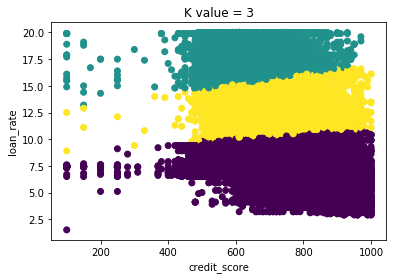

In [11]:
# 클러스터 생성
model = KMeans(n_clusters = 3)
ids = model.fit_predict(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
plt.tight_layout()
# 서브플롯의 라벨링
plt.title("K value = {}".format(3))
plt.xlabel('credit_score')
plt.ylabel('loan_rate')
# 클러스터링 그리기
plt.scatter(processed_data['credit_score'], processed_data['loan_rate'], c=ids)  
plt.show()

In [38]:
r = pd.concat([feature, predict],axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [39]:
type(feature)

numpy.ndarray

In [40]:
type(predict)

pandas.core.frame.DataFrame

In [3]:
merged_df = pd.read_csv('./data/merged_user_loan.csv', index_col=0)

In [4]:
merged_df.reset_index(inplace=True)

In [ ]:
merged_df

In [5]:
merged_df=merged_df.drop(['application_id', 'user_id','insert_time','index','loanapply_insert_time', 'bank_id', 'product_id'],axis=1)

In [6]:
merged_df.dropna(inplace=True)

In [ ]:
merged_df

In [7]:
merged_df.shape, merged_df[merged_df['is_applied']==1].shape

((594841, 17), (35872, 17))

In [8]:
cate_list = [
    'income_type',
    'employment_type',
    'houseown_type',
    'purpose']

In [9]:
for cate in cate_list:
    merged_df = pd.get_dummies(data = merged_df, columns=[cate], prefix=cate)

In [10]:
tmp =pd.concat([merged_df[merged_df['is_applied']==0].sample(35872, random_state=42), merged_df[merged_df['is_applied']==1].sample(35872, random_state=42)])

In [12]:
scaler = preprocessing.MinMaxScaler()
tmp[['credit_score', 'loan_rate']]=\
scaler.fit_transform(tmp[['credit_score', 'loan_rate']])

In [16]:
X,y =tmp.loc[:, tmp.columns !='is_applied'] ,tmp['is_applied']

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
model2 = RandomForestClassifier(random_state=42)

In [20]:
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
model2.score(X_test,y_test)

0.8154575231723465

In [22]:
y_pred = model2.predict(X_test)
f1_score(y_test, y_pred)

0.8199619254827304

In [23]:
confusion_matrix(y_test, y_pred)

array([[5671, 1524],
       [1124, 6030]], dtype=int64)

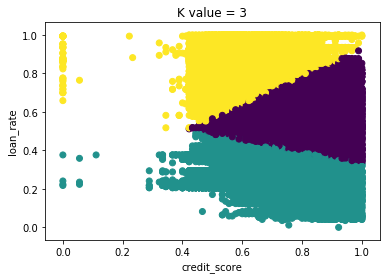

In [24]:
model = KMeans(n_clusters = 3)
ids = model.fit_predict(tmp[['credit_score', 'loan_rate']])
predict = pd.DataFrame(model.predict(tmp[['credit_score', 'loan_rate']]))
predict.columns=['predict']
plt.tight_layout()
# 서브플롯의 라벨링
plt.title("K value = {}".format(3))
plt.xlabel('credit_score')
plt.ylabel('loan_rate')
# 클러스터링 그리기
plt.scatter(tmp['credit_score'], tmp['loan_rate'], c=ids)  
plt.show()

In [34]:
predict

,predict
0,2
1,1
2,1
3,1
4,0
...,...
71739,1
71740,1
71741,2
71742,1


In [35]:
tmp.reset_index(inplace=True)

In [36]:
tmp['predict'] = predict['predict']

In [38]:
tmp.drop(['index'], axis =1, inplace=True)

In [39]:
X,y =tmp.loc[:, tmp.columns !='is_applied'] ,tmp['is_applied']

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [41]:
model2 = RandomForestClassifier(random_state=42)

In [42]:
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
model2.score(X_test,y_test)

0.8141333890863475

In [44]:
y_pred = model2.predict(X_test)
f1_score(y_test, y_pred)

0.8189778049277132

In [45]:
confusion_matrix(y_test, y_pred)

array([[5649, 1546],
       [1121, 6033]], dtype=int64)

In [ ]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=3)
kmeans.fit(points)

# 결과 확인
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

In [ ]:
sns.set_palette("Set2")

In [ ]:
sns.scatterplot(x="credit_score", y="loan_rate", hue="cluster", data=result_by_sklearn, palette="Set2");